In [1]:
import torch
import sys
from torchvision import transforms
from pathlib import Path
sys.path.append("../")
from Helper_Modules import helper_functions
from Helper_Modules import utils, model_setups

c:\Users\AbdelrahmanE\AppData\Local\anaconda3\envs\pytorchv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## tr_v0_64_5e5: not_cropped

In [3]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v0_64_5e5 = utils.download_model("Organ-Classifier-1", "tr_v0_64_5e5:v1", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

downloading the model: tr_v0_64_5e5:v1


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: elsharkawi99 (d-ml). Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  


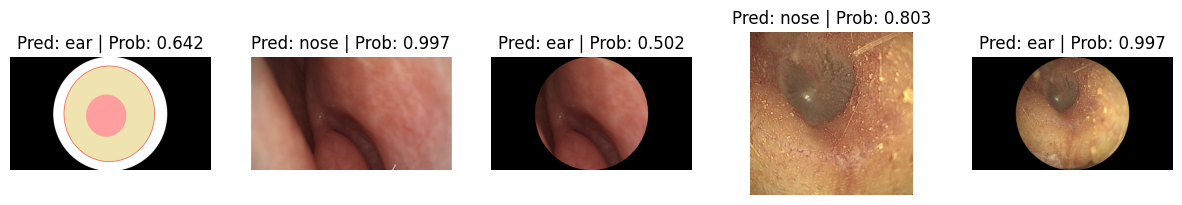

In [4]:
fake_paths = list(Path("data/fake_images/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v0_64_5e5, device, ["ear", "nose", "vocal_folds"], fake_paths, (15,30))

## tr_v1_64_5e5: cropped

In [5]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v1_64_5e5 = utils.download_model("Organ-Classifier-1", "tr_v1_64_5e5:v0", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

downloading the model: tr_v1_64_5e5:v0


wandb:   1 of 1 files downloaded.  


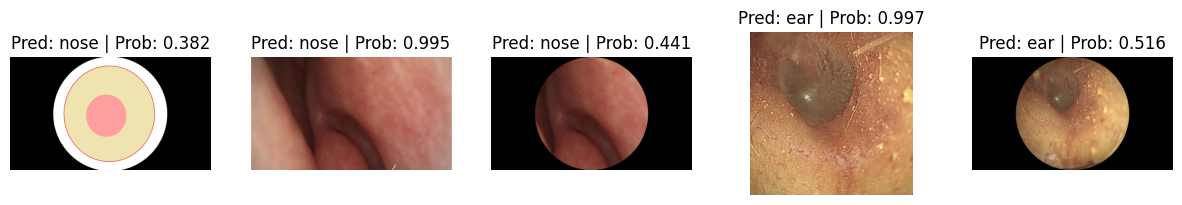

In [6]:
fake_paths = list(Path("data/fake_images/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v1_64_5e5, device, ["ear", "nose", "vocal_folds"], fake_paths, (15,30))

# evluate datasets v4 and v5
- The good quality images used here are taken from 3D cameras. Which is neither in train nor in test datasets 
- The bad quality images are from the train and test dataset

! The model which has a highere probabilities fo rthe correct preds and less probabilities for the false preds is better !

# v4

In [22]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v4_32_5e6_5e5 = utils.download_model("Organ-Classifier-1", "tr_v4_32_5e6_5e5:v0", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

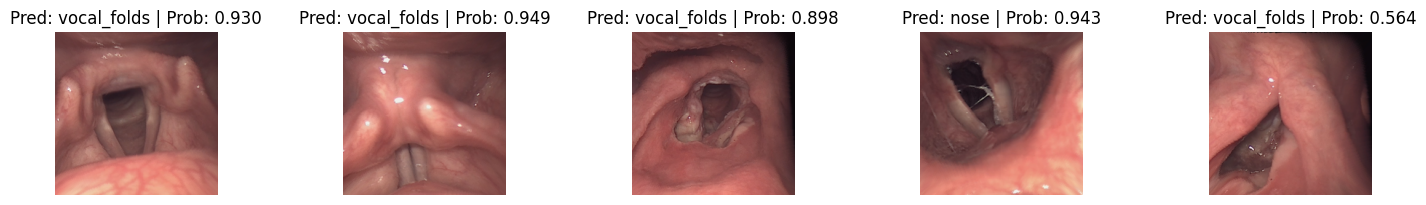

In [45]:
test_images_new = list(Path("data/test_images_new/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v4_32_5e6_5e5, device, ["ear", "nose", "vocal_folds"], test_images_new, (18,30), True )

## v5

### tr_v5_64_5e6_5e5_sqrt:v1

In [25]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v5_64_5e6_5e5_sqrt = utils.download_model("Organ-Classifier-1", "tr_v5_64_5e6_5e5_sqrt:v1", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

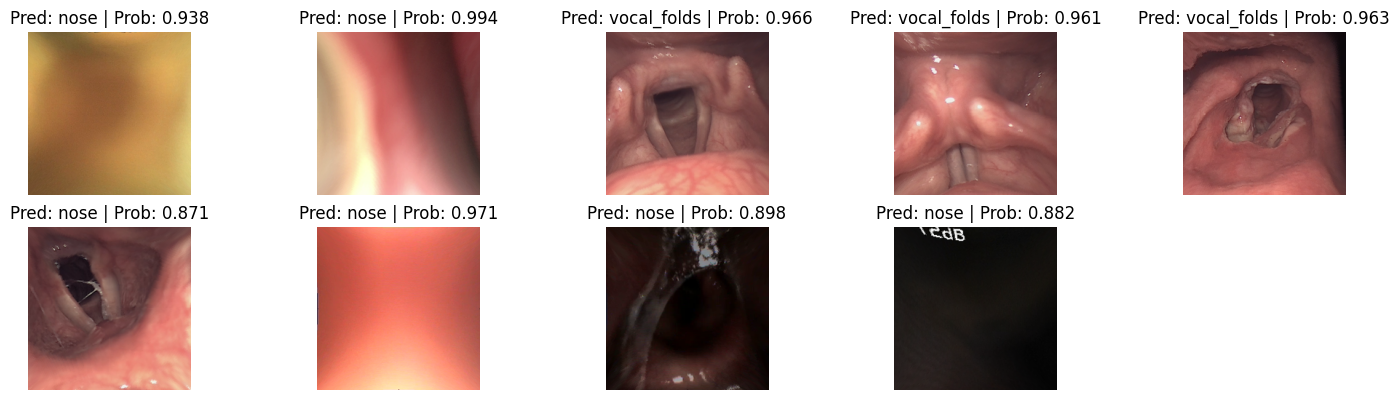

In [32]:
fake_paths = list(Path("data/test_images_new/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v5_64_5e6_5e5_sqrt, device, ["ear", "nose", "vocal_folds"], fake_paths, (18,30), True )

### tr_v5_32_5e6_5e5:v1

In [20]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v5_32_5e6_5e5 = utils.download_model("Organ-Classifier-1", "tr_v5_32_5e6_5e5:v1", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

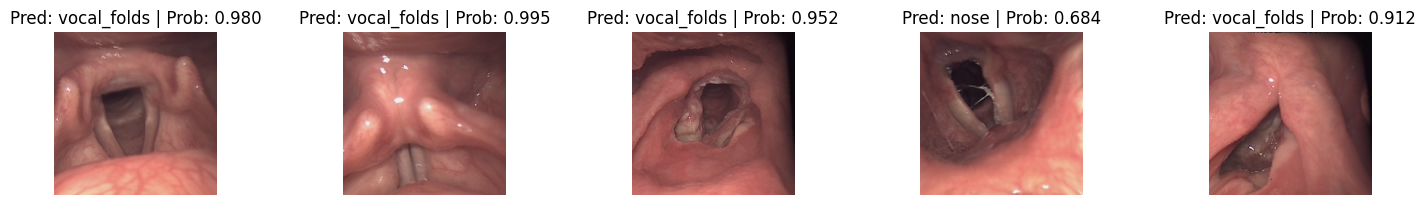

In [44]:
test_images_new = list(Path("data/test_images_new/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v5_32_5e6_5e5, device, ["ear", "nose", "vocal_folds"], test_images_new, (18,30), True )

### tr_v5_64_5e6_5e5:v1

In [27]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v5_64_5e6_5e5 = utils.download_model("Organ-Classifier-1", "tr_v5_64_5e6_5e5:v1", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

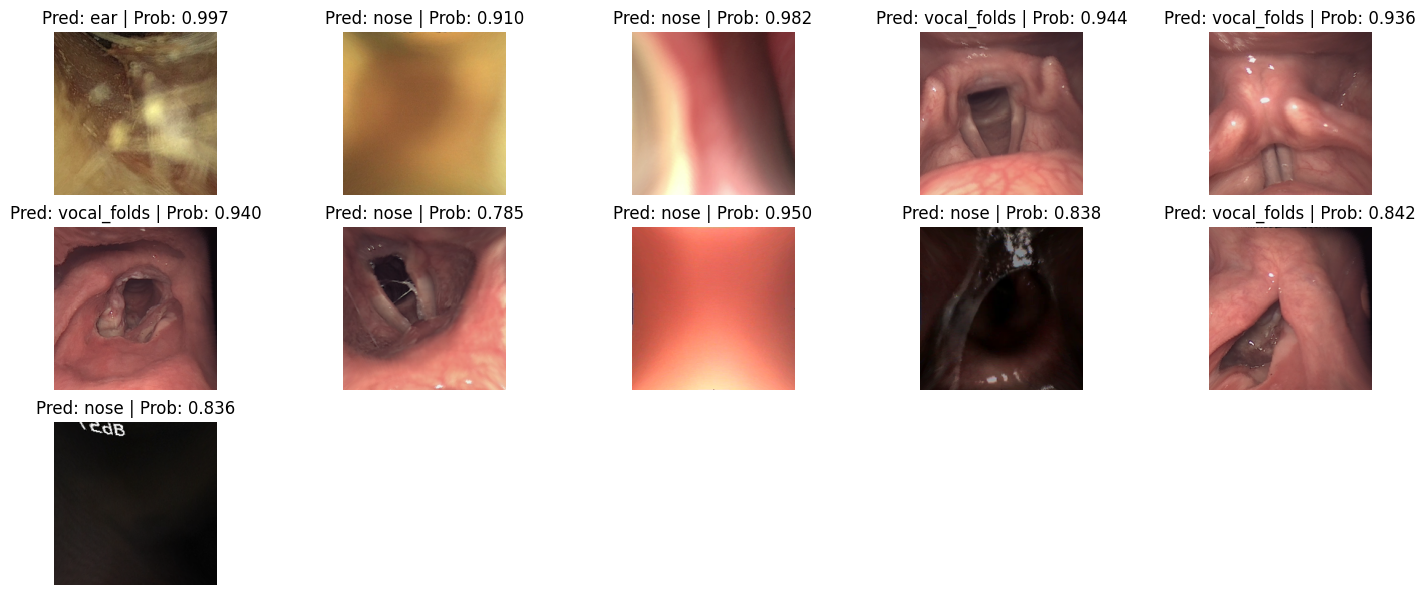

In [41]:
fake_paths = list(Path("data/test_images_new/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v5_64_5e6_5e5, device, ["ear", "nose", "vocal_folds"], fake_paths, (18,30), True )

### tr_v5_64_7e5:v1
too fast, wrong predictions high probability

In [29]:
model = model_setups.efficientNet_b0(False, 3, device)
tr_v5_64_7e5 = utils.download_model("Organ-Classifier-1", "tr_v5_64_7e5:v1", "trained_model.pth", model)
auto_transforms = [
    transforms.Resize((224, 224)), 
    transforms.ToTensor(), # this includes scaling the pixel values 0..1
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]

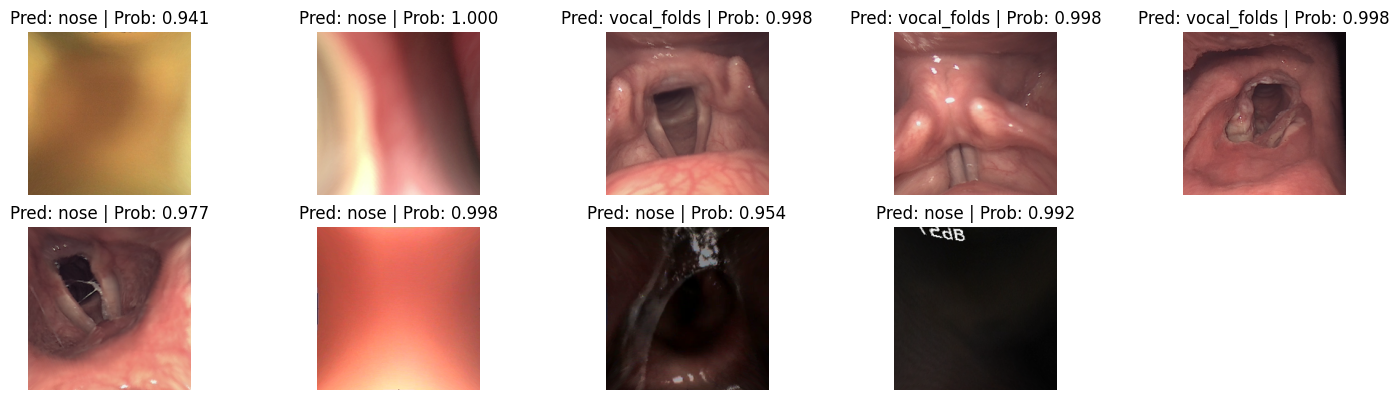

In [35]:
fake_paths = list(Path("data/test_images_new/").glob("*.png"))
helper_functions.predict_on_list(auto_transforms, tr_v5_64_7e5, device, ["ear", "nose", "vocal_folds"], fake_paths, (18,30), True )